Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/thread_ring/'

N = 500_000
R = 50_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}4/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:37:28 2025 +0100) (510.58ms ela...,0.420,0.0411,0.608,2.50,0.18,13.23,53.51 C,Nominal
1,(Fri Mar 28 09:37:29 2025 +0100) (508.09ms ela...,0.619,0.0609,0.707,1.65,0.26,18.12,53.51 C,Nominal
2,(Fri Mar 28 09:37:29 2025 +0100) (505.93ms ela...,0.980,0.0380,0.662,1.98,0.23,17.02,53.13 C,Nominal
3,(Fri Mar 28 09:37:30 2025 +0100) (508.20ms ela...,0.236,0.0307,0.445,1.01,0.17,12.22,53.13 C,Nominal
4,(Fri Mar 28 09:37:30 2025 +0100) (509.54ms ela...,0.246,0.0177,0.393,0.97,0.17,12.28,52.95 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(276, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:37:40 2025 +0100) (1011.11ms el...,37.2,0.0445,1.20,39.98,3.93,98.80,56.75 C,Nominal
1,(Fri Mar 28 09:37:41 2025 +0100) (1004.87ms el...,34.9,0.0346,1.13,38.17,3.88,98.33,60.02 C,Nominal
2,(Fri Mar 28 09:37:42 2025 +0100) (1005.01ms el...,35.0,0.0335,1.23,38.25,3.75,97.94,62.83 C,Nominal
3,(Fri Mar 28 09:37:43 2025 +0100) (1005.79ms el...,38.4,0.0316,1.27,41.74,3.92,99.35,66.23 C,Nominal
4,(Fri Mar 28 09:37:44 2025 +0100) (1005.27ms el...,38.3,0.0328,1.15,41.52,3.94,98.83,68.88 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:26:03 2025 +0100) (512.22ms ela...,0.3270,0.0000,0.280,0.42,0.11,8.20,44.19 C,Nominal
1,(Fri Mar 28 09:26:04 2025 +0100) (506.44ms ela...,7.3500,0.0422,0.524,7.98,1.25,99.56,44.19 C,Nominal
2,(Fri Mar 28 09:26:04 2025 +0100) (506.53ms ela...,1.7300,0.0000,0.414,2.01,0.38,35.25,44.25 C,Nominal
3,(Fri Mar 28 09:26:05 2025 +0100) (508.55ms ela...,0.0823,0.0000,0.268,0.13,0.05,2.89,44.25 C,Nominal
4,(Fri Mar 28 09:26:05 2025 +0100) (508.60ms ela...,0.0456,0.0000,0.293,0.09,0.03,2.39,44.26 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(309, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 09:26:15 2025 +0100) (1008.94ms el...,21.60,0.0,1.010,22.45,2.61,96.75,44.82 C,Nominal
1,(Fri Mar 28 09:26:16 2025 +0100) (1005.25ms el...,18.40,0.0,0.773,19.16,2.40,98.03,47.66 C,Nominal
2,(Fri Mar 28 09:26:17 2025 +0100) (1007.57ms el...,9.86,0.0,1.310,10.92,1.02,99.51,49.95 C,Nominal
3,(Fri Mar 28 09:26:18 2025 +0100) (1006.87ms el...,9.69,0.0,1.300,10.75,1.01,99.48,51.40 C,Nominal
4,(Fri Mar 28 09:26:19 2025 +0100) (1007.42ms el...,9.09,0.0,1.110,10.04,0.94,92.11,52.48 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:37:28,0.420,0.0411,0.608,2.50,0.18,13.23,53.51,Nominal,510.58
1,2025-03-28 09:37:29,0.619,0.0609,0.707,1.65,0.26,18.12,53.51,Nominal,508.09
2,2025-03-28 09:37:29,0.980,0.0380,0.662,1.98,0.23,17.02,53.13,Nominal,505.93
3,2025-03-28 09:37:30,0.236,0.0307,0.445,1.01,0.17,12.22,53.13,Nominal,508.20
4,2025-03-28 09:37:30,0.246,0.0177,0.393,0.97,0.17,12.28,52.95,Nominal,509.54


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(276, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:37:40,37.2,0.0445,1.20,39.98,3.93,98.80,56.75,Nominal,1011.11
1,2025-03-28 09:37:41,34.9,0.0346,1.13,38.17,3.88,98.33,60.02,Nominal,1004.87
2,2025-03-28 09:37:42,35.0,0.0335,1.23,38.25,3.75,97.94,62.83,Nominal,1005.01
3,2025-03-28 09:37:43,38.4,0.0316,1.27,41.74,3.92,99.35,66.23,Nominal,1005.79
4,2025-03-28 09:37:44,38.3,0.0328,1.15,41.52,3.94,98.83,68.88,Nominal,1005.27


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:26:03,0.3270,0.0000,0.280,0.42,0.11,8.20,44.19,Nominal,512.22
1,2025-03-28 09:26:04,7.3500,0.0422,0.524,7.98,1.25,99.56,44.19,Nominal,506.44
2,2025-03-28 09:26:04,1.7300,0.0000,0.414,2.01,0.38,35.25,44.25,Nominal,506.53
3,2025-03-28 09:26:05,0.0823,0.0000,0.268,0.13,0.05,2.89,44.25,Nominal,508.55
4,2025-03-28 09:26:05,0.0456,0.0000,0.293,0.09,0.03,2.39,44.26,Nominal,508.60


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(309, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 09:26:15,21.60,0.0,1.010,22.45,2.61,96.75,44.82,Nominal,1008.94
1,2025-03-28 09:26:16,18.40,0.0,0.773,19.16,2.40,98.03,47.66,Nominal,1005.25
2,2025-03-28 09:26:17,9.86,0.0,1.310,10.92,1.02,99.51,49.95,Nominal,1007.57
3,2025-03-28 09:26:18,9.69,0.0,1.300,10.75,1.01,99.48,51.40,Nominal,1006.87
4,2025-03-28 09:26:19,9.09,0.0,1.110,10.04,0.94,92.11,52.48,Nominal,1007.42


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


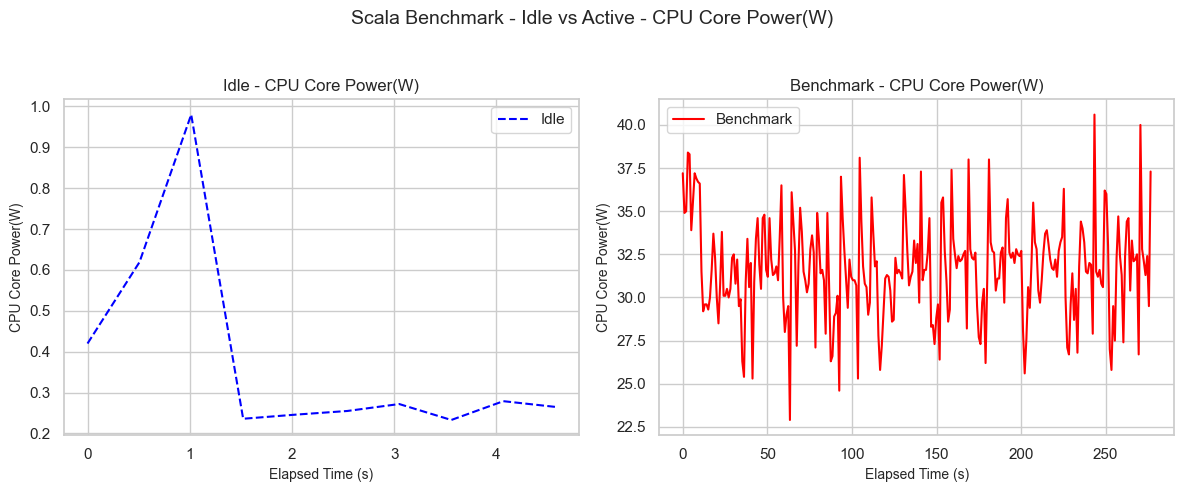

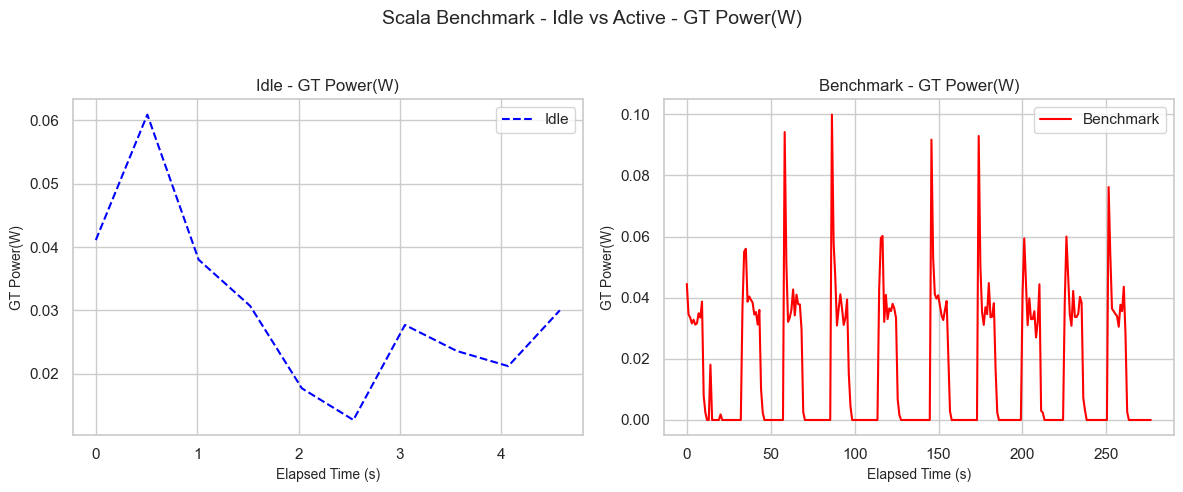

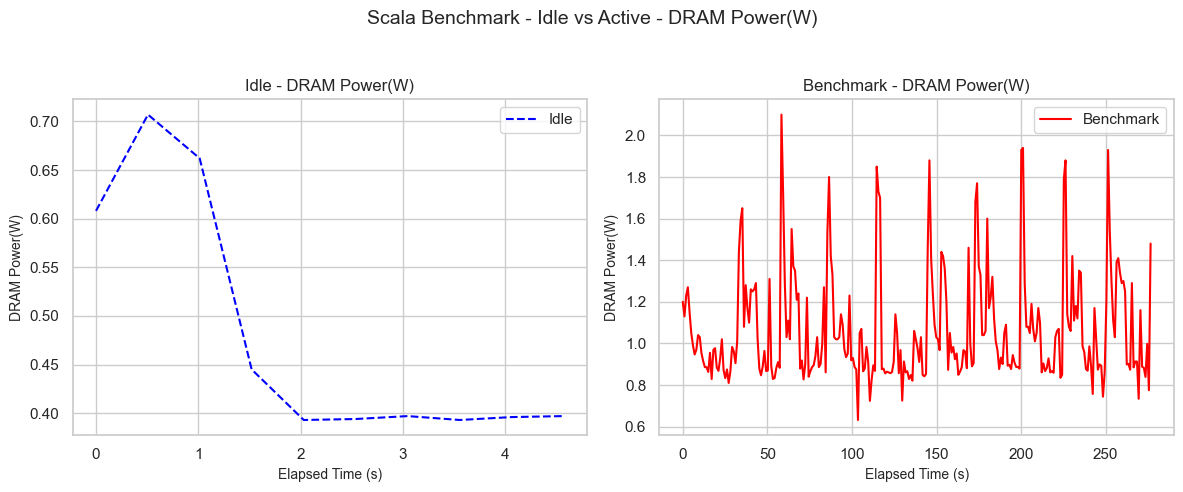

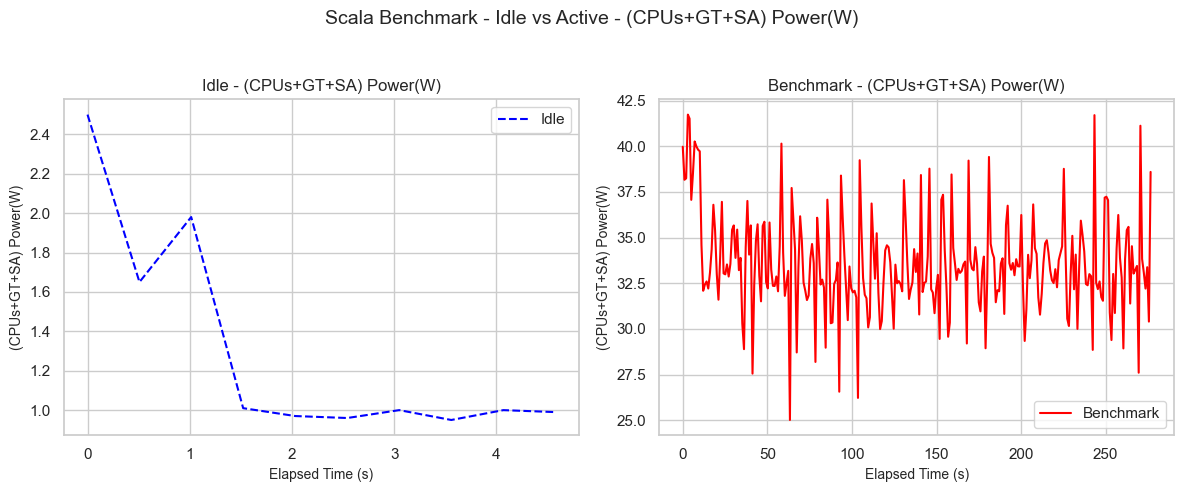

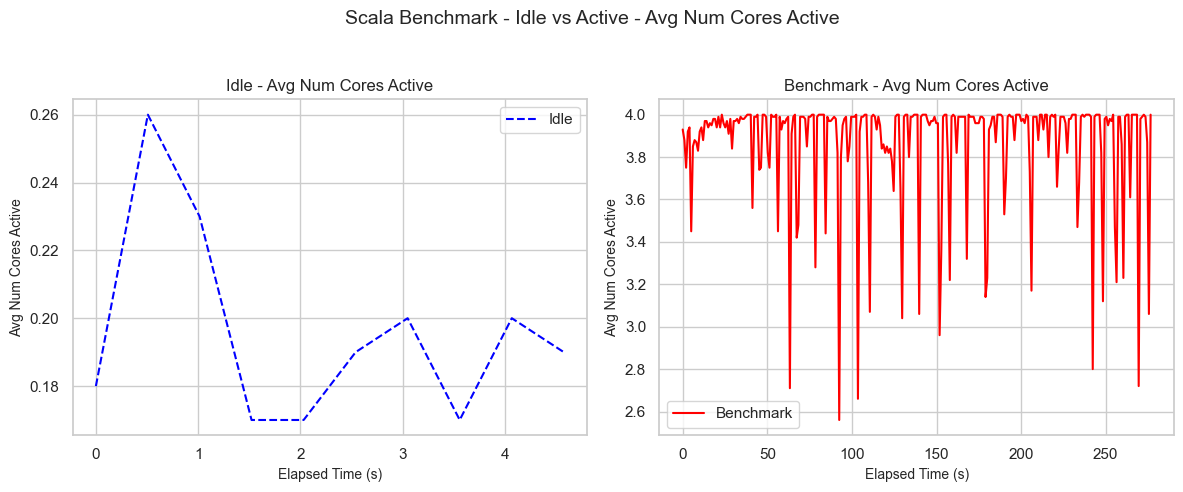

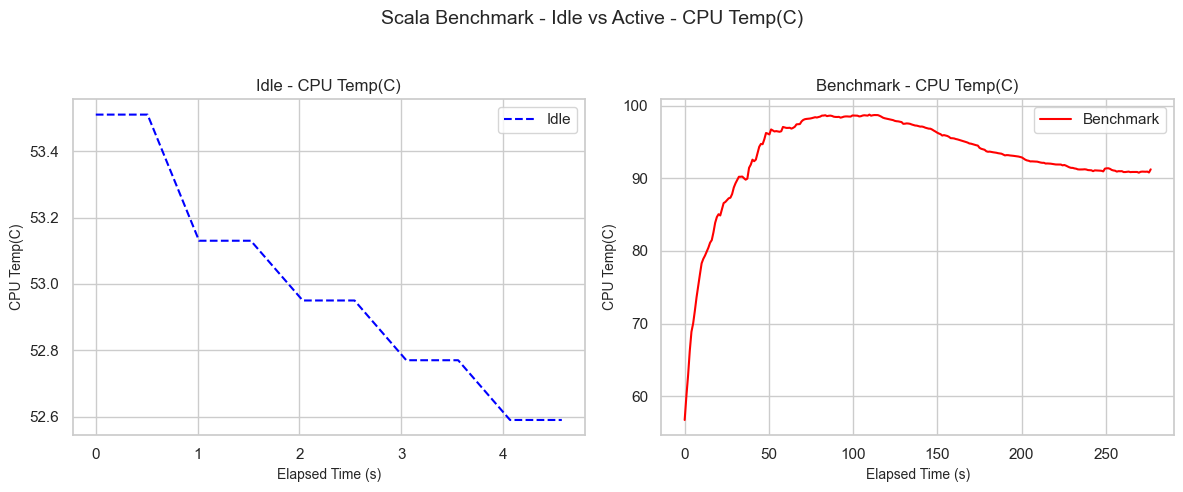

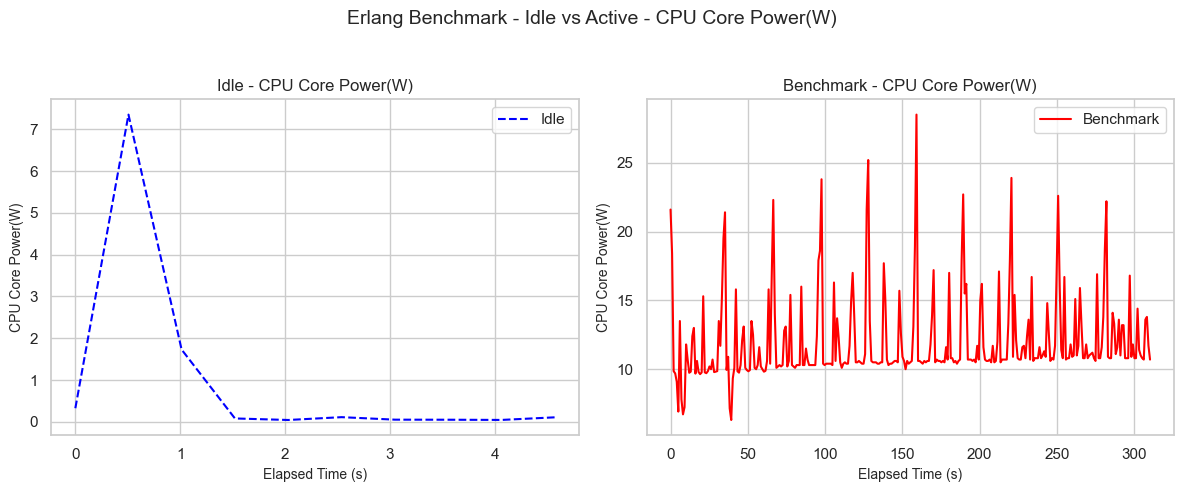

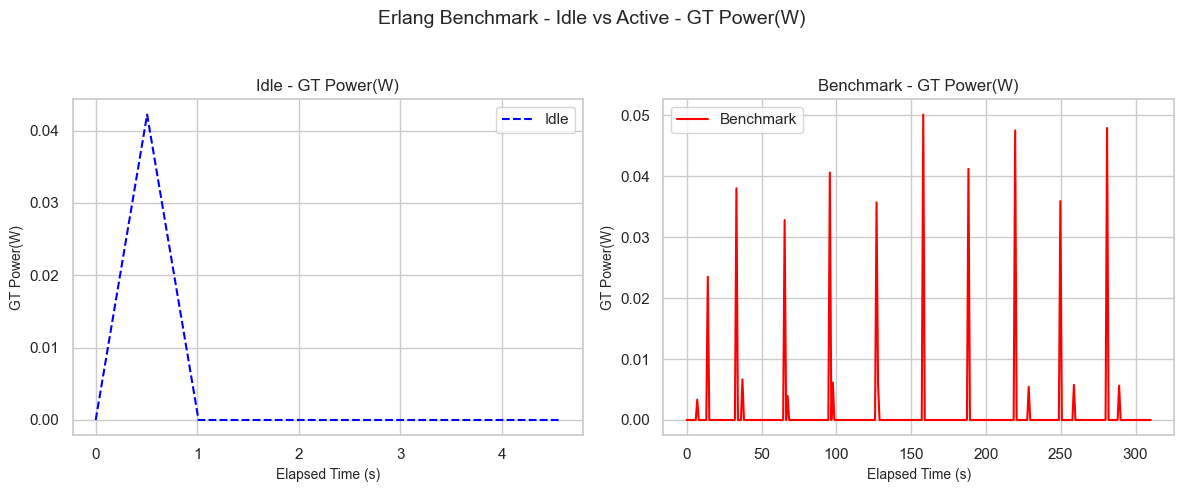

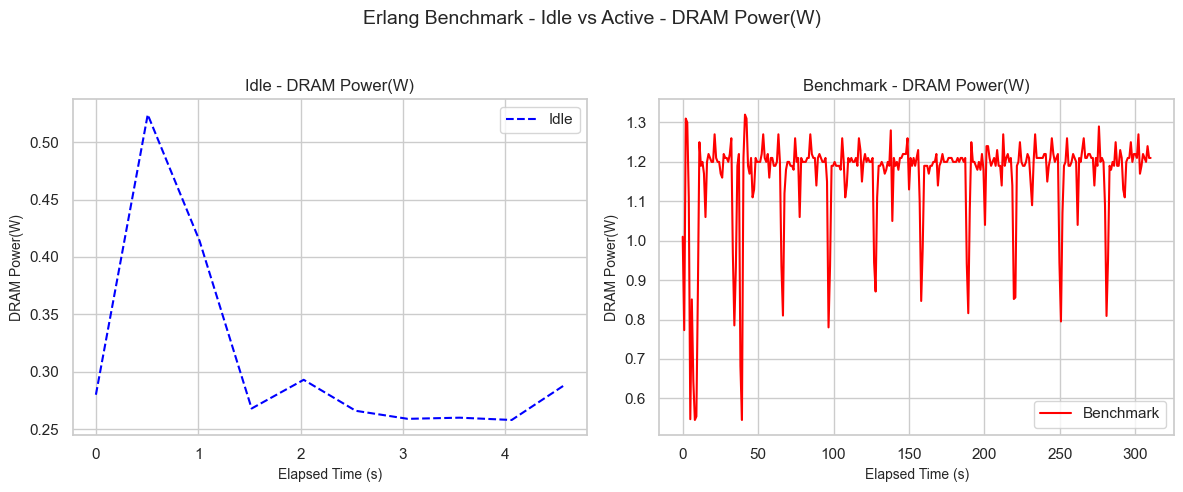

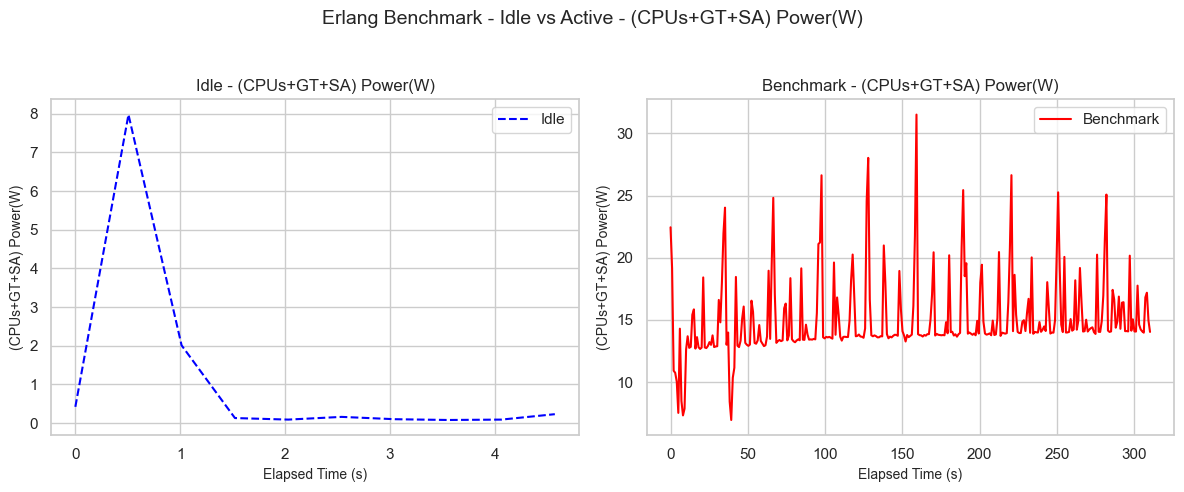

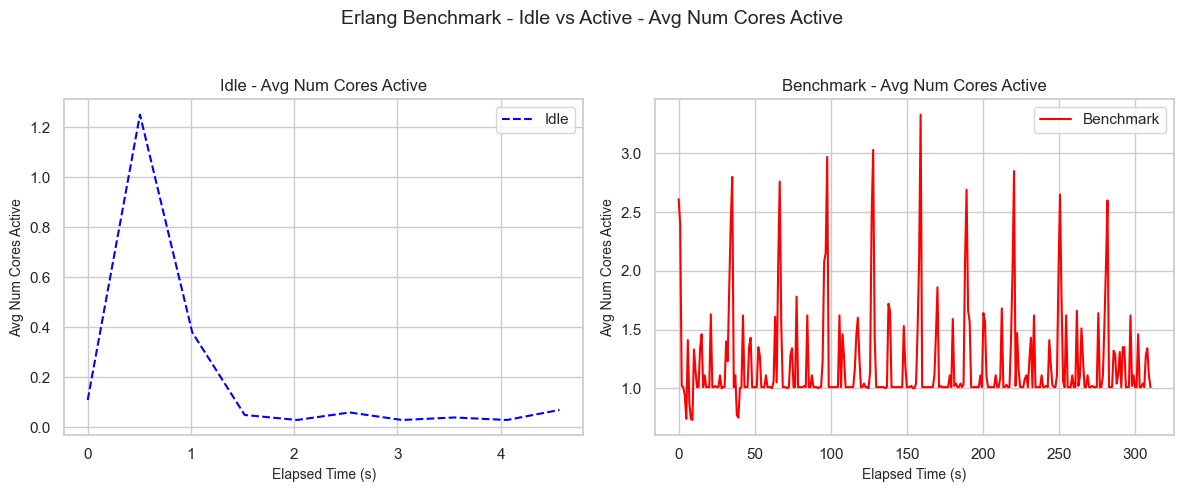

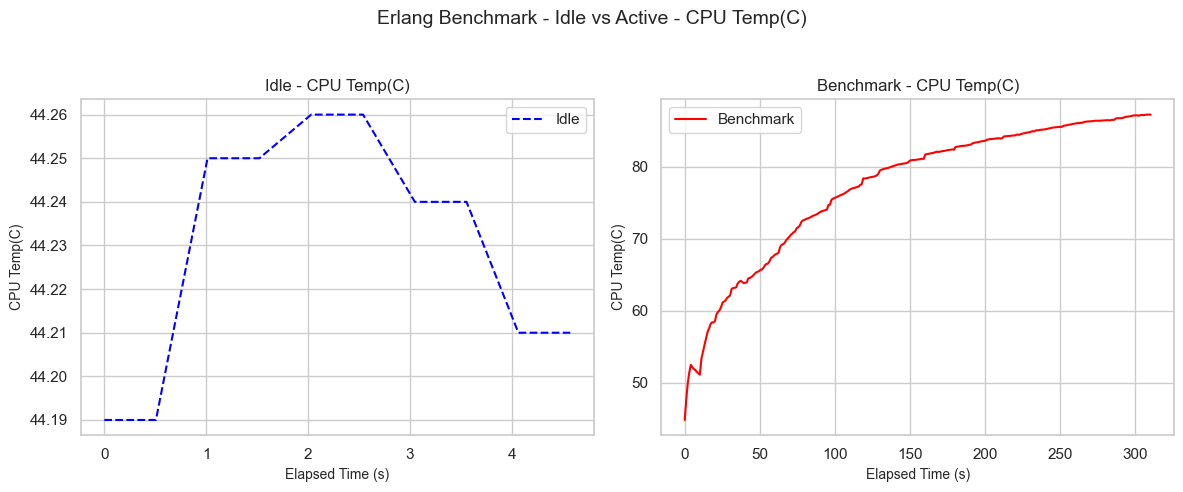

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

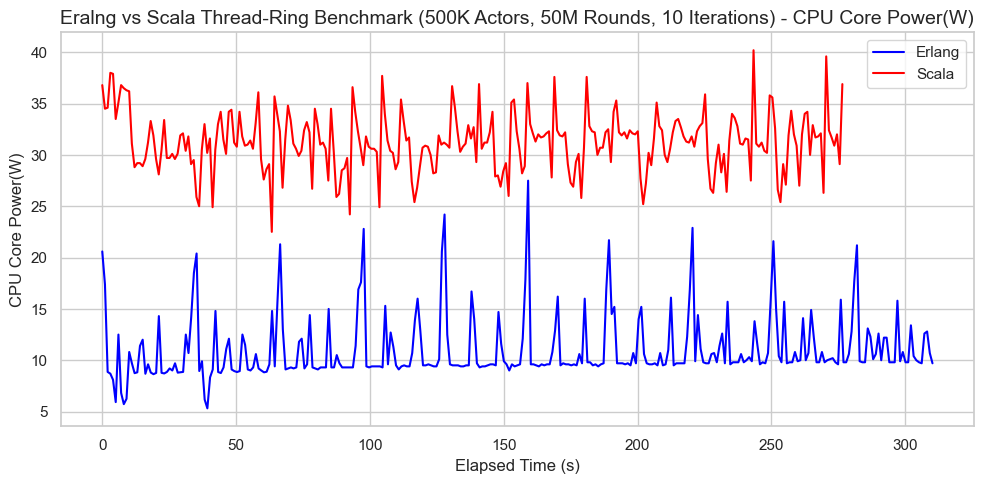

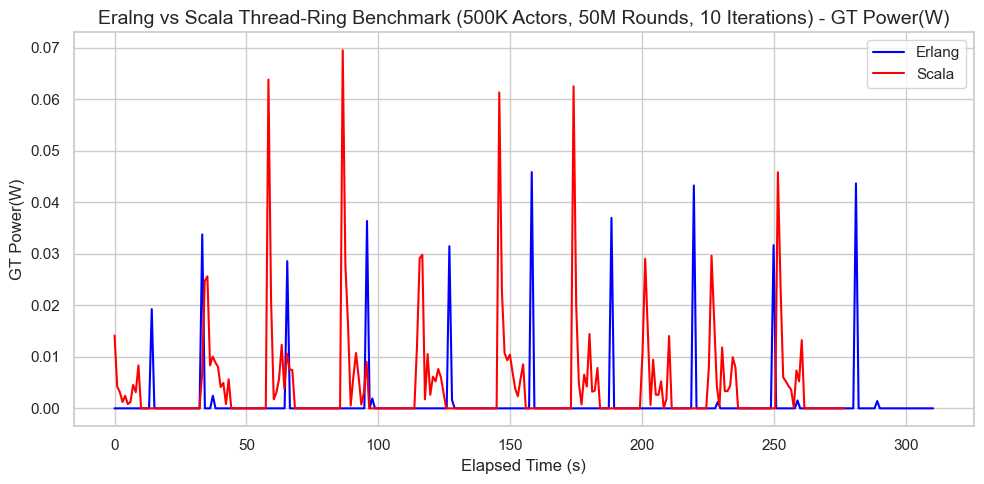

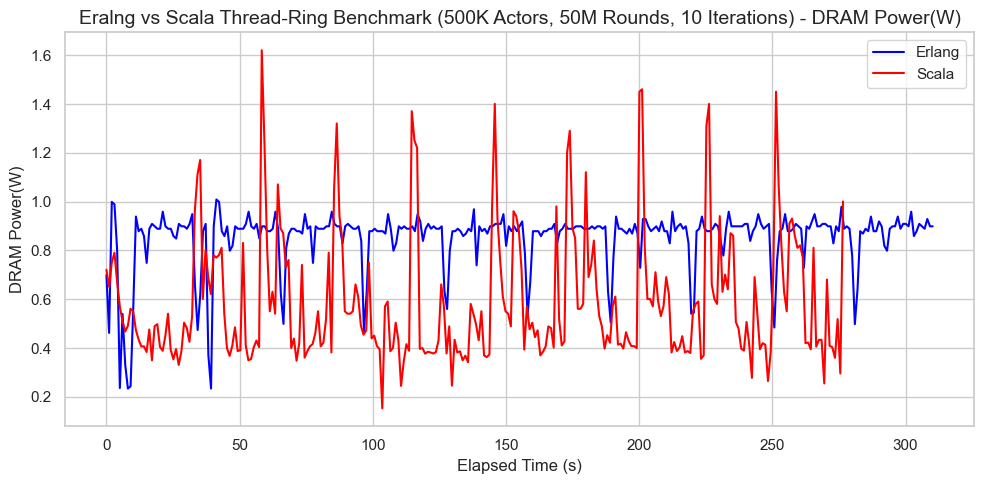

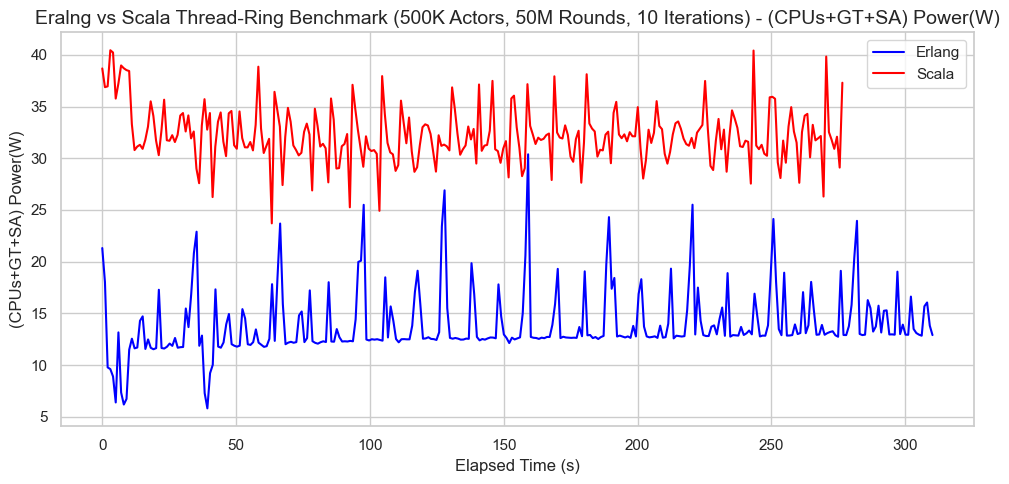

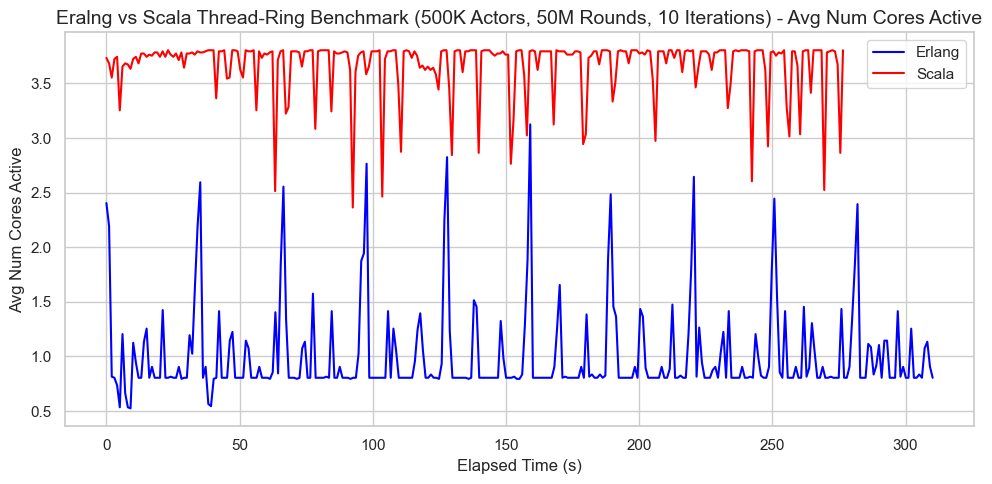

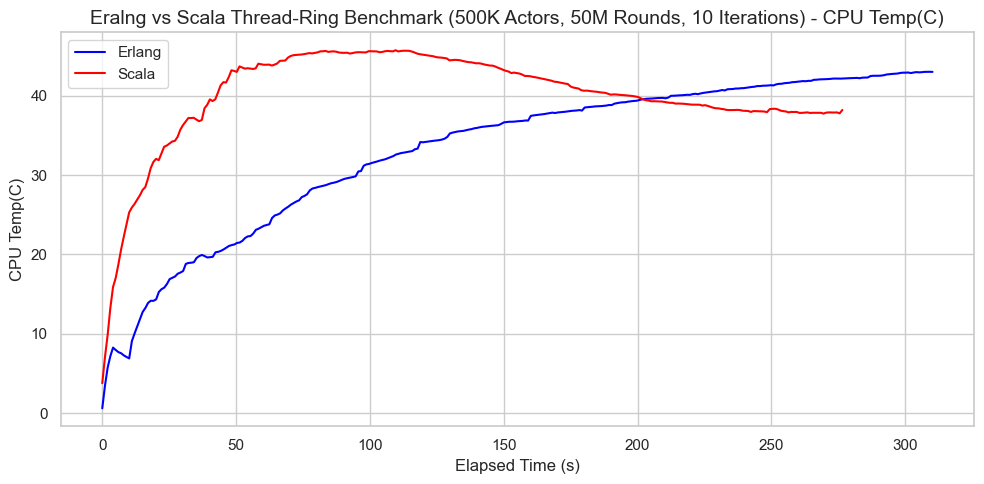

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        31.271674
GT Power(W)              -0.014146
DRAM Power(W)             0.586528
(CPUs+GT+SA) Power(W)    32.277225
CPU Temp(C)              39.945399
Avg Num Cores Active      3.673493
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.017081
GT Power(W)              -0.002809
DRAM Power(W)             0.852599
(CPUs+GT+SA) Power(W)    13.929447
CPU Temp(C)              33.085372
Avg Num Cores Active      1.004353
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 8957.872331915942 Joules
Erlang Benchmark: 4334.811187619223 Joules
